<h1>Rotation Matrix</h1>
<p>Rotate a point (vector) counterclockwise by &ang; &Theta;.</p>
<h3>Equation</h3>
<p>New Points = Transformation Matrix * Old Points</p>
$$ x^{\prime} = Ax $$
<h3>Solve</h3>
<p>Rotate vector points (2,1) by 90 degrees.</p>
$$ \begin{bmatrix}
x^{\prime}  \\
y^{\prime} 
\end{bmatrix} = \begin{bmatrix}
cos(\theta) & -sin(\theta) \\
sin(\theta) & cos(\theta)
\end{bmatrix} \begin{bmatrix}
2  \\
1 
\end{bmatrix} $$

In [1]:
# Imports
import sympy as sp
import math
from sympy.physics.vector import *
import matplotlib.pyplot as plt
import numpy as np
sp.init_printing()

In [2]:
# Create World Reference Frame
W = ReferenceFrame('W')

# Create a vector to rotate in the World Reference Frame
vector_one = 2 * W.x + 1 * W.y
vector_one

In [3]:
# Display vector_one as a column matrix.
X = sp.Matrix([2, 1])
X

⎡2⎤
⎢ ⎥
⎣1⎦

In [4]:
# Obtain the new vector points when multiplying the rotation matrix by vector X.
x, y, theta = sp.symbols('x y theta')
rotation_matrix = sp.Matrix([[sp.cos(theta), -sp.sin(theta)],
                             [sp.sin(theta), sp.cos(theta)]])
X_matrix = sp.Matrix([x, y])
rotation_matrix * X_matrix

⎡x⋅cos(θ) - y⋅sin(θ)⎤
⎢                   ⎥
⎣x⋅sin(θ) + y⋅cos(θ)⎦

In [7]:
# Create a rotation matrix to rotate vector_one by the variable degrees
degrees = 30

# Rotation Matrix
A = sp.Matrix([[round(np.cos(np.deg2rad(degrees)), 3), round(-np.sin(np.deg2rad(degrees)), 3)],
               [round(np.sin(np.deg2rad(degrees)), 3), round(np.cos(np.deg2rad(degrees)), 3)]])
A

⎡0.866  -0.5 ⎤
⎢            ⎥
⎣ 0.5   0.866⎦

In [5]:
# Obtain the new (x, y) coordinates after vector one has been rotated
X_prime = A * X
X_prime

⎡-1.0⎤
⎢    ⎥
⎣2.0 ⎦

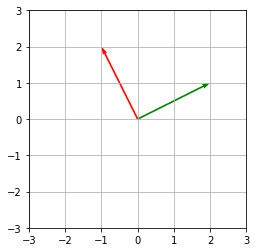

In [11]:
origin_x = 0
origin_y = 0

# Plot the vector in 2D space.
v1 = {'X1': origin_x, 'X2': float(X[0]), 
      'Y1': origin_y, 'Y2': float(X[1])}

v1_prime= {'X1': origin_x, 'X2': float(X_prime[0]), 
           'Y1': origin_y, 'Y2': float(X_prime[1])}

fig, ax = plt.subplots()

# Plot vector (2, 1)
q = ax.quiver(v1['X1'],v1['Y1'], 
              v1['X2'], v1['Y2'], units='xy', scale=1, color='green')

q = ax.quiver(v1_prime['X1'],v1_prime['Y1'], 
              v1_prime['X2'], v1_prime['Y2'], units='xy', scale=1, color='red')

# Adds grid lines to the graph.
plt.grid()

# Same scaling from data to plot units for x and y
ax.set_aspect('equal')

# X and Y axis limits 
plt.xlim(-3,3)
plt.ylim(-3,3)